In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("googleplaystore_user_reviews.csv")
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [27]:
#Since we need Translated_Reviews and Sentiment so we take them 
df= pd.concat([df.Translated_Review, df.Sentiment], axis=1)
df.dropna(axis=0, inplace=True)

In [28]:
#Checking the types of sentiments
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [29]:
df.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in df.Sentiment]
df.Sentiment.head()

0    0
1    0
3    0
4    0
5    0
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Sentiments')

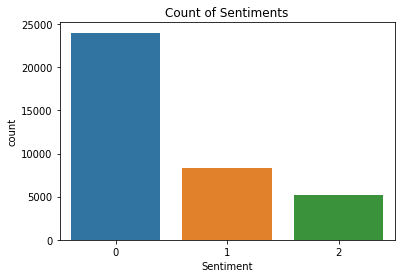

In [30]:
#Visualizing using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df.Sentiment)
plt.title("Count of Sentiments")

In [40]:
#The preprocessing Step and creation of BagOfWords
import re
import nltk
from nltk.corpus import stopwords

texts=[]
for i in df.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nltk.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    texts.append(text)
    
#texts

In [38]:
#Cleaning BagOfWords
from sklearn.feature_extraction.text import CountVectorizer

max_f=1000
CntVec = CountVectorizer(max_features = max_f)
sparse_mat = CntVec.fit_transform(texts).toarray()
words = CntVec.get_feature_names()
#words[0:100]

In [43]:
#creating the feature matrix and target vector
X =sparse_mat
y = df.iloc[:,1].values

In [47]:
#splitting the training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=1)

In [53]:
#fitting data and predicting using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
model.fit(xtrain,ytrain)

y_pred = model.predict(xtest)

In [57]:
#checking accuracy
from sklearn.metrics import accuracy_score
print("Accuracy_score: ", accuracy_score(ytest,y_pred))

Accuracy_score:  0.892733101790008


In [62]:
#for better accuracy trying LogisyicRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

y_pred_lr = lr.predict(xtest)
print("Accuracy_score: ",accuracy_score(ytest,y_pred_lr))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy_score:  0.9011488111140796
